In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from descarga_st import rescata_dataset
from descarga_usuarios import rescata_usuarios
from calcula import  grafica_meses, grafica_ultimo_mes
from calcula_aux import aplicar_formulas_kpi, medidas_centrales
import nest_asyncio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
nest_asyncio.apply()

In [2]:
""" import aiohttp
import datetime as dt
import pandas as pd
import asyncio
from typing import Optional, List, Tuple
import streamlit as st

async def consulta(
    fecha_inicio: str,
    fecha_fin: str,
    compania: str = "9",
    corredora: str = "SANTANDER",
    
    api_url: str = "https://www.let.cl/wslet/consulta/reporteConsultorExterno",
    periodo_dias: int = 10
) -> Optional[pd.DataFrame]:
    ""
    Realiza consultas a la API en intervalos de 10 días y combina los resultados en un solo DataFrame, cubriendo un total de 6 meses.

    Args:
        compania: Código de la compañía.
        corredora: Nombre de la corredora.
        fecha_inicio: Fecha de inicio de la consulta (formato YYYY-MM-DD).
        fecha_fin: Fecha de fin de la consulta (formato YYYY-MM-DD).
        api_url: URL de la API.
        periodo_dias: Período de cada consulta en días.

    Returns:
        Un DataFrame de pandas con la combinación de los resultados de la API, o None en caso de error.
    ""
    headers = {
        "authorization": st.secrets["api_auth"],  # Usar el secreto de Streamlit
        "compania": compania,
        "corredora": corredora,
    }

    inicio = dt.datetime.strptime(fecha_inicio, "%Y-%m-%d")
    fin = dt.datetime.strptime(fecha_fin, "%Y-%m-%d")
    periodos = []
    dataframes: List[pd.DataFrame] = []  # Lista para almacenar los DataFrames

    # Calcular los períodos de consulta
    while inicio < fin:
        fin_periodo = inicio + dt.timedelta(days=periodo_dias)
        if fin_periodo > fin:
            fin_periodo = fin
        periodos.append((inicio, fin_periodo))
        inicio = fin_periodo

    async with aiohttp.ClientSession() as session:
        for inicio_periodo, fin_periodo in periodos:
            headers["fecha_inicial"] = inicio_periodo.strftime("%Y-%m-%d")
            headers["fecha_final"] = fin_periodo.strftime("%Y-%m-%d")

            try:
                async with session.get(api_url, headers=headers, timeout=60) as response:  # Agregar timeout
                    if response.status == 200:
                        response_text = await response.text()
                        # Guardar respuesta en archivo (opcional, para debugging)
                        with open("consulta_resultado.txt", "a", encoding='cp1252') as file:
                            file.write(f"{dt.datetime.now()} - Periodo: {inicio_periodo} - {fin_periodo}\n{response_text}\n")
                        print(
                            "Success: Result saved to consulta_resultado.txt",
                            dt.datetime.now(),
                            f"Periodo: {inicio_periodo} - {fin_periodo}",
                        )
                        # Convertir la respuesta a DataFrame y agregar a la lista
                        try:
                            df_periodo = pd.read_csv(io.StringIO(response_text), sep=";")
                            dataframes.append(df_periodo)
                        except Exception as e:
                            print(f"Error al leer CSV: {e}")
                            print(f"Texto de la respuesta:\n{response_text}")
                            return None  # Importante: retornar None en caso de error al procesar el CSV

                    else:
                        print(
                            "Failed:",
                            response.status,
                            await response.text(),
                            f"Periodo: {inicio_periodo} - {fin_periodo}",
                        )
                        return None  # Retornar None en caso de error en la llamada a la API
            except aiohttp.ClientError as e:
                print(f"Error de conexión: {e}, Periodo: {inicio_periodo} - {fin_periodo}")
                return None  # Retornar None en caso de error de conexión
            except asyncio.TimeoutError:
                print(f"Timeout al consultar la API, Periodo: {inicio_periodo} - {fin_periodo}")
                return None # Retornar None en caso de Timeout

        # Combinar todos los DataFrames en uno solo
        if dataframes:
            df_final = pd.concat(dataframes, ignore_index=True)
            return df_final
        else:
            return None  # Retornar None si no se obtuvieron datos

await consulta( "2025-04-15", "2025-05-10","9", "SANTANDER") """

' import aiohttp\nimport datetime as dt\nimport pandas as pd\nimport asyncio\nfrom typing import Optional, List, Tuple\nimport streamlit as st\n\nasync def consulta(\n    fecha_inicio: str,\n    fecha_fin: str,\n    compania: str = "9",\n    corredora: str = "SANTANDER",\n\n    api_url: str = "https://www.let.cl/wslet/consulta/reporteConsultorExterno",\n    periodo_dias: int = 10\n) -> Optional[pd.DataFrame]:\n    ""\n    Realiza consultas a la API en intervalos de 10 días y combina los resultados en un solo DataFrame, cubriendo un total de 6 meses.\n\n    Args:\n        compania: Código de la compañía.\n        corredora: Nombre de la corredora.\n        fecha_inicio: Fecha de inicio de la consulta (formato YYYY-MM-DD).\n        fecha_fin: Fecha de fin de la consulta (formato YYYY-MM-DD).\n        api_url: URL de la API.\n        periodo_dias: Período de cada consulta en días.\n\n    Returns:\n        Un DataFrame de pandas con la combinación de los resultados de la API, o None en cas

In [3]:
data = rescata_dataset()

Consultando API... compania=9, corredora=SANTANDER
Dataset ya cargado, no se vuelve a consultar
Index(['id_inspeccion', 'metaOI', 'oi_asociada_meta', 'cia', 'num_interno',
       'corredor', 'num_corredor', 'ramo', 'marca', 'modelo', 'patente',
       'chasis', 'estado', 'fecha_emision', 'hora_emision', 'fecha_1_llamada',
       'hora_1_llamada', 'num_llamadas_totales', 'fecha_ult_devol',
       'motivo_ult_dev', 'comentario_ult_dev', 'num_dev_totales',
       'fecha_ult_reintento', 'hora_ult_reintento', 'comentario_ult_reintento',
       'num_total_reintento', 'fecha_1_llamada_post_ult_reintento',
       'hora_1_llamada_post_ult_reintento', 'fecha_1_agendamiento',
       'hora_1_agendamiento', '', 'fecha_ult_agendamiento',
       'hora_ult_agendamiento', 'num_agendamiento_totales',
       'fecha_cita_conreta_inspeccion', 'hora_cita_conreta_inspeccion',
       'inspector', 'realizada_app', 'fecha_inicio_inspeccion',
       'hora_inicio_inspeccion', 'fecha_termino_inspeccion',
       'h

In [4]:
data.shape[0]

960

In [5]:
data["informe_final"].unique()

array(['Informe Autoinspeccion', 'Informe Normal', '', 'Informe asistida'],
      dtype=object)

In [6]:
#kpi_columns = [col for col in df_calc.columns if "kpi" in col.lower()]
#print(kpi_columns)

In [7]:
df_calc = aplicar_formulas_kpi(data)

c:\AAA Python\202503_LET_DASH\do_streamlit\calcula_aux.py:674: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fecha_mayor = pd.to_datetime(fecha_mayor, errors='coerce')
c:\AAA Python\202503_LET_DASH\do_streamlit\calcula_aux.py:280: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fecha_fin = pd.to_datetime(fecha_fin, errors='coerce')
c:\AAA Python\202503_LET_DASH\do_streamlit\calcula_aux.py:674: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  fecha_mayor = pd.to_datetime(fecha_mayor, errors='coerce')
c:\AAA Python\202503_LET_DASH\do_streamlit\calcula_aux.py:280: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was sp

In [8]:
#df_calc["cálculo días en coordinar DC"].describe()

In [9]:
#df_calc["KPI DÍAS EN COORDINAR DC"].describe()

In [10]:
#df_calc["KPI DÍAS EN COORDINAR DC OK"].describe()

In [11]:
#df_calc["cálculo días en coordinar DH"].describe()

In [12]:
# Función auxiliar para verificar si un texto contiene un subtexto
def verificar_si_contiene(texto, subtexto):
    return 1 if subtexto in texto else 0

# Función auxiliar para verificar si un texto contiene al menos uno de los subtextos en una lista
def verificar_si_contiene_alguno(texto, lista_subtextos):
    return 1 if any(subtexto in texto for subtexto in lista_subtextos) else 0

# Aplicar la lógica a cada fila del DataFrame
def calcular_kpi_porcentaje_ai_mayor_uno(row):
    n_errores_ai = row["AI con error N° veces"]
    kpi_porcentaje_ai_mayor_uno = ""

    hubo_un_error = verificar_si_contiene(str(n_errores_ai), "1")

    if hubo_un_error:
        mas_de_un_error = verificar_si_contiene_alguno(str(n_errores_ai), ["2+", "3+", "4+", "5+", "6+", "7+", "8+", "9+", "10+", "11+", "12+"])

        if hubo_un_error > 0:
            try:
                porcentaje = mas_de_un_error / hubo_un_error
                kpi_porcentaje_ai_mayor_uno = porcentaje
            except ZeroDivisionError:
                kpi_porcentaje_ai_mayor_uno = "n/a"
        else:
            kpi_porcentaje_ai_mayor_uno = 0
    else:
        kpi_porcentaje_ai_mayor_uno = 0

    return kpi_porcentaje_ai_mayor_uno

# Crear la nueva columna en el DataFrame
df_calc["KPI % AI con error > 1 vez"] = df_calc.apply(calcular_kpi_porcentaje_ai_mayor_uno, axis=1)

In [13]:
# Count the total rows where "AI con error N° veces" is not null
total_filas_ai_con_error = df_calc["AI con error N° veces"].notnull().sum()

# Define a function to calculate "KPI % AI con error = 1 vez" for each row
def calcular_kpi_porcentaje_ai_uno(row):
    n_errores_ai = row["AI con error N° veces"]
    kpi_porcentaje_ai_uno = ""

    contiene_uno = verificar_si_contiene(str(n_errores_ai), "1")

    if contiene_uno > 0:
        conteo_uno = contiene_uno  # Since "verificar_si_contiene" returns 1 if "1" is present
        try:
            porcentaje = conteo_uno / total_filas_ai_con_error
            kpi_porcentaje_ai_uno = porcentaje
        except ZeroDivisionError:
            kpi_porcentaje_ai_uno = "n/a"
    else:
        kpi_porcentaje_ai_uno = "n/a"

    return kpi_porcentaje_ai_uno

# Apply the function to the dataset
df_calc["KPI % AI con error = 1 vez"] = df_calc.apply(calcular_kpi_porcentaje_ai_uno, axis=1)

In [14]:
# Calculate the total occurrences of "AI sin error" in the column "AI con error N° veces"
total_sin_error = df_calc["AI con error N° veces"].value_counts().get("AI sin error", 0)

# Calculate the total number of rows in the column "AI con error N° veces"
total_filas_ai_con_error = df_calc["AI con error N° veces"].notnull().sum()

# Define a function to calculate "KPI % AI sin error" for each row
def calcular_kpi_porcentaje_ai_sin_error(row):
    if total_sin_error > 0:
        return total_sin_error / total_filas_ai_con_error
    return "n/a"

# Apply the function to the dataset
df_calc["KPI % AI sin error"] = df_calc.apply(calcular_kpi_porcentaje_ai_sin_error, axis=1)

In [15]:
# Calculate the total occurrences of "Informe OK" in the column "informe_final"
total_informes_ok = df_calc["informe_final"].value_counts().get("Informe OK", 0)

# Calculate the total number of rows in the column "informe_final"
total_informes = df_calc["informe_final"].notnull().sum()

# Define a function to calculate "KPI % informes OK" for each row
def calcular_kpi_porcentaje_informes_ok(row):
    if total_informes > 0:
        return total_informes_ok / total_informes
    return "n/a"

# Apply the function to the dataset
df_calc["KPI % informes OK"] = df_calc.apply(calcular_kpi_porcentaje_informes_ok, axis=1)

In [16]:
# Calculate the total occurrences of "Informe KO" in the column "informe_final"
total_informes_ko = df_calc["informe_final"].value_counts().get("Informe KO", 0)

# Calculate the total number of rows in the column "informe_final"
total_informes = df_calc["informe_final"].notnull().sum()

# Define a function to calculate "KPI % informes KO" for each row
def calcular_kpi_porcentaje_informes_ko(row):
    if total_informes > 0:
        return total_informes_ko / total_informes
    return "n/a"

# Apply the function to the dataset
df_calc["KPI % informes KO"] = df_calc.apply(calcular_kpi_porcentaje_informes_ko, axis=1)

# Gráficas

https://docs.google.com/spreadsheets/d/1lHeV45yRsWVUhMg6INJu2fTyB2L5wOOb/edit?gid=156517352#gid=156517352

In [17]:
display(df_calc.columns.to_list())

['id_inspeccion',
 'metaOI',
 'oi_asociada_meta',
 'cia',
 'num_interno',
 'corredor',
 'num_corredor',
 'ramo',
 'marca',
 'modelo',
 'patente',
 'chasis',
 'estado',
 'fecha_emision',
 'hora_emision',
 'fecha_1_llamada',
 'hora_1_llamada',
 'num_llamadas_totales',
 'fecha_ult_devol',
 'motivo_ult_dev',
 'comentario_ult_dev',
 'num_dev_totales',
 'fecha_ult_reintento',
 'hora_ult_reintento',
 'comentario_ult_reintento',
 'num_total_reintento',
 'fecha_1_llamada_post_ult_reintento',
 'hora_1_llamada_post_ult_reintento',
 'fecha_1_agendamiento',
 'hora_1_agendamiento',
 '',
 'fecha_ult_agendamiento',
 'hora_ult_agendamiento',
 'num_agendamiento_totales',
 'fecha_cita_conreta_inspeccion',
 'hora_cita_conreta_inspeccion',
 'inspector',
 'realizada_app',
 'fecha_inicio_inspeccion',
 'hora_inicio_inspeccion',
 'fecha_termino_inspeccion',
 'hora_termino_inspeccion',
 'fecha_transmision_inspeccion',
 'hora_transmision_inspeccion',
 'fecha_1_fallida',
 'hora_1_fallida',
 'fecha_2_fallida',
 'h

In [18]:
kpi_columns = [col for col in df_calc.columns if ("kpi" in col.lower() or "gral" in col.lower())]

In [19]:
entrega_cols = [col for col in df_calc.columns if ("entrega" in col.lower())]
entrega_cols

['fecha_entrega_informe',
 'hora_entrega_informe',
 'datetime_entrega_informe',
 'añomes entrega informe',
 'fecha/hora entrega informe ASIS']

In [ ]:
# Convertir a datetime solo si ambos valores son válidos
# df_calc['datetime_entrega_informe'] = df_calc.apply(
#     lambda row: pd.to_datetime(
#         f"{row['fecha_entrega_informe']} {row['hora_entrega_informe']}"#, 
#         #errors='coerce'
#     ) if pd.notnull(row['fecha_entrega_informe']) and pd.notnull(row['hora_entrega_informe']) else pd.NaT,
#     axis=1
# )


In [21]:
df_calc['datetime_entrega_informe'].value_counts()

datetime_entrega_informe
2025-11-04 16:57:00    2
2025-10-04 17:00:00    1
2025-11-04 13:02:00    1
2025-11-04 15:28:00    1
2025-11-04 12:17:00    1
                      ..
2025-10-04 17:13:00    1
2025-10-04 15:49:00    1
2025-10-04 12:28:00    1
2025-08-04 20:45:00    1
2025-11-04 17:44:00    1
Name: count, Length: 316, dtype: int64

In [22]:

# Crear un gráfico de barras para cada columna que contiene "kpi" en su nombre
""" for col in kpi_columns:
    valid_values = df_calc[col][~df_calc[col].isin(["error", "n/a"])]
    
    plt.figure(figsize=(4, 2))
    sns.countplot(x=valid_values, order=valid_values.value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show() """



' for col in kpi_columns:\n    valid_values = df_calc[col][~df_calc[col].isin(["error", "n/a"])]\n\n    plt.figure(figsize=(4, 2))\n    sns.countplot(x=valid_values, order=valid_values.value_counts().index)\n    plt.title(f"Distribución de {col}")\n    plt.xlabel(col)\n    plt.ylabel("Frecuencia")\n    plt.xticks(rotation=45)\n    plt.show() '

In [23]:
kpi_columns

['KPI DÍAS EN COORDINAR DC',
 'KPI DÍAS EN COORDINAR DC OK',
 'KPI DÍAS EN COORDINAR DH',
 'KPI DÍAS EN COORDINAR DH OK',
 'KPI DÍAS EN INSPECCIONAR DC',
 'KPI DÍAS EN INSPECCIONAR DC OK',
 'KPI DÍAS EN INSPECCIONAR DH',
 'KPI DÍAS EN INSPECCIONAR DH OK',
 'KPI resp BO DOM CEILING',
 'KPI resp BO DOM CEILING OK',
 'KPI resp BO AI CEILING',
 'KPI resp BO AI CEILING OK',
 'KPI resp BO AI sin error CEILING',
 'KPI resp BO AI sin error CEILING OK',
 'resp BO GRAL',
 'resp BO GRAL EXCLUYE 0 y 9+',
 'resp BO GRAL CEILING',
 'resp BO GRAL CEILING OK',
 'resp BO GRAL CEILING OK HMS',
 'KPI resp BO ASIS CEILING',
 'KPI resp BO ASIS CEILING OK',
 'KPI % AI con error > 1 vez',
 'KPI % AI con error = 1 vez',
 'KPI % AI sin error',
 'KPI % informes OK',
 'KPI % informes KO']

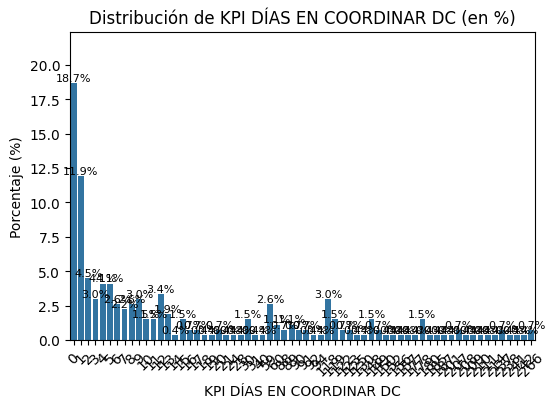

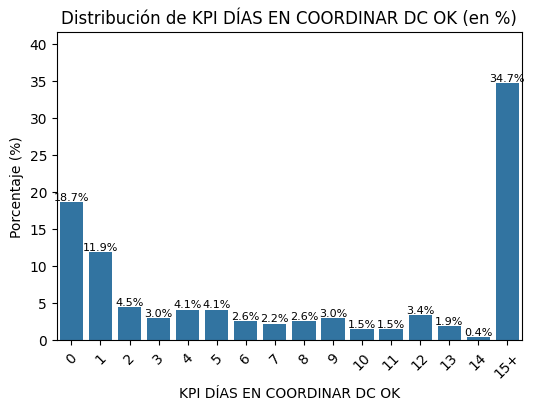

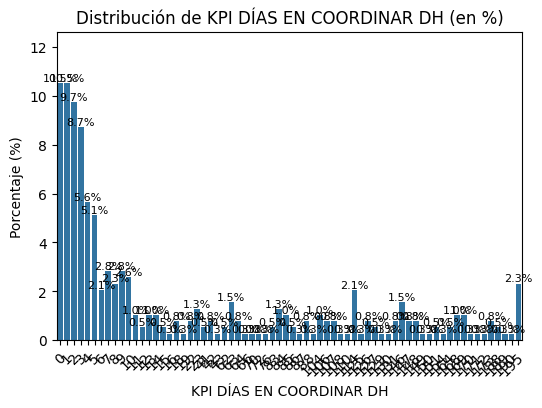

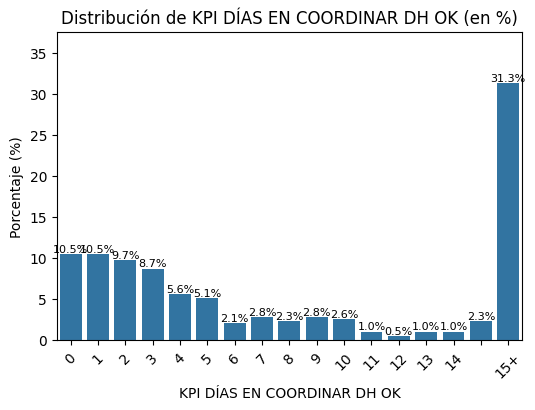

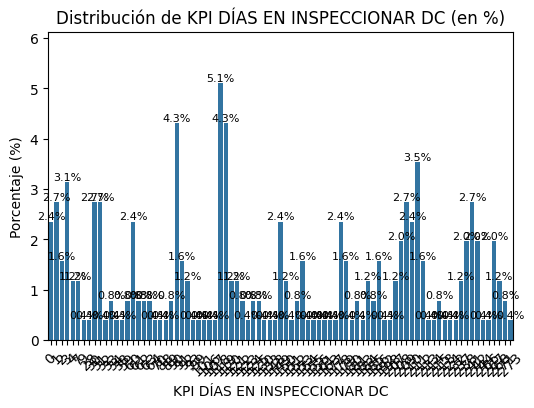

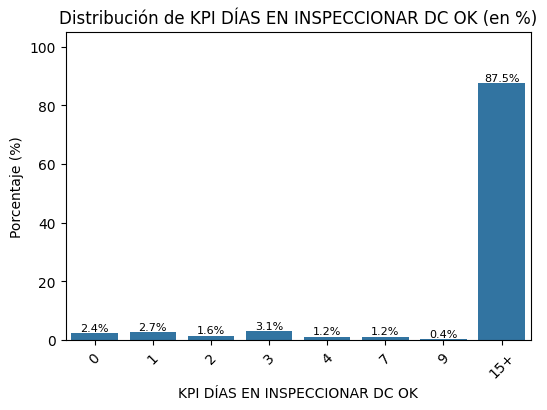

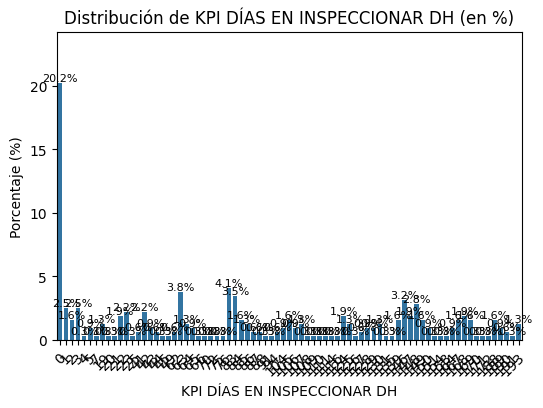

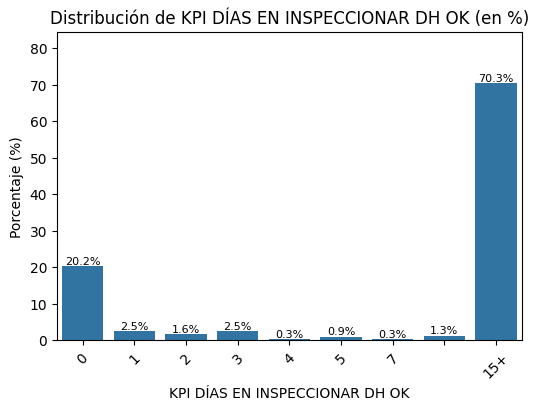

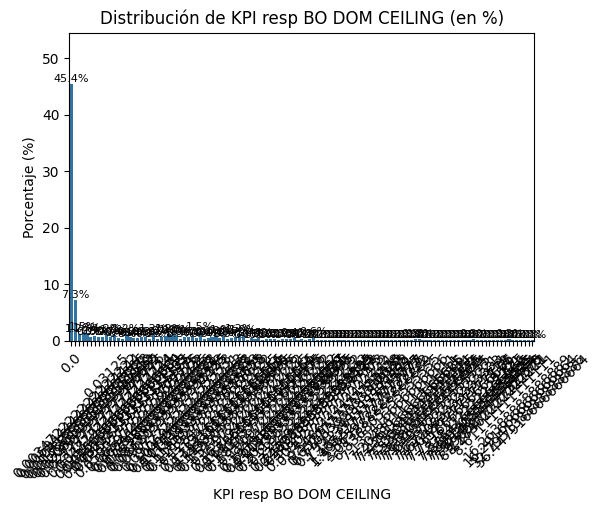

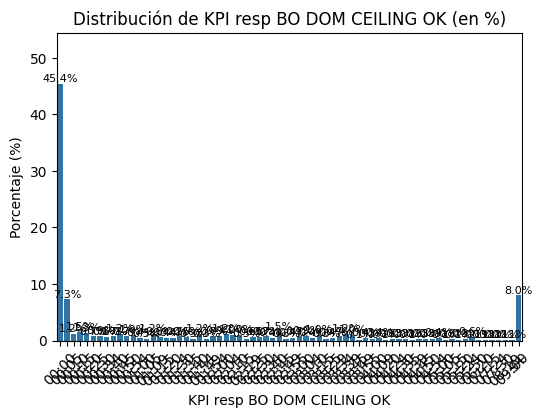

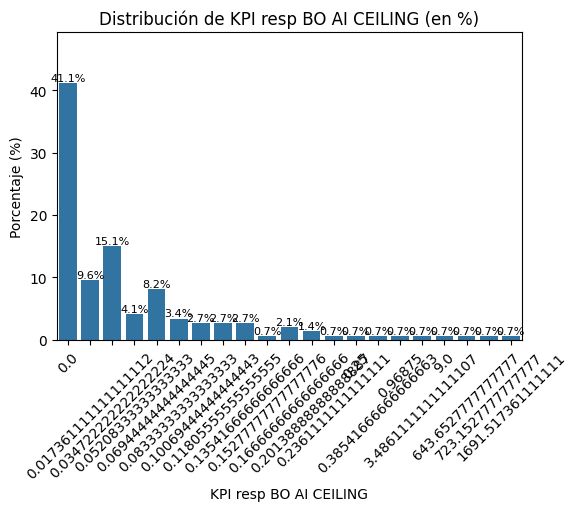

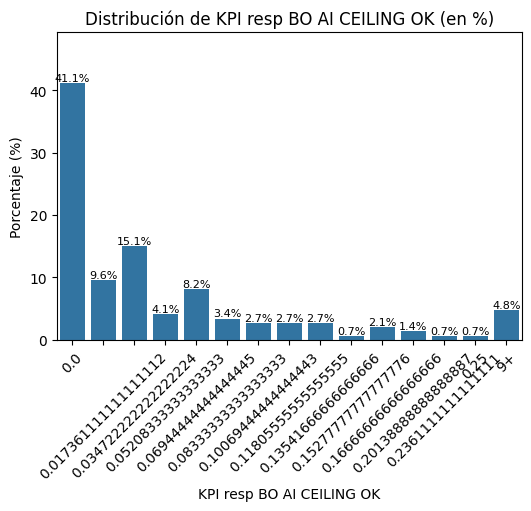

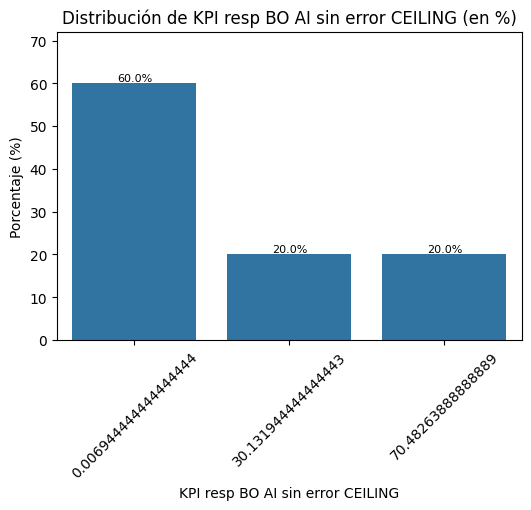

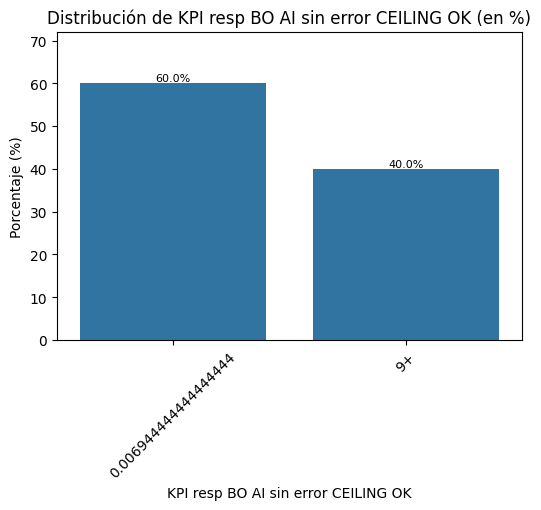

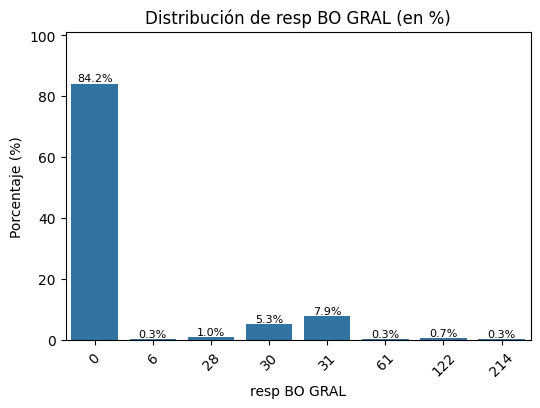

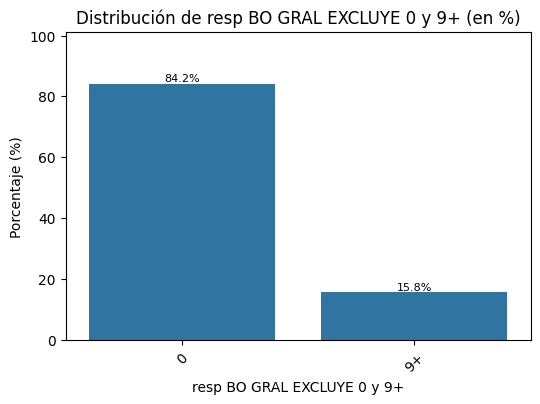

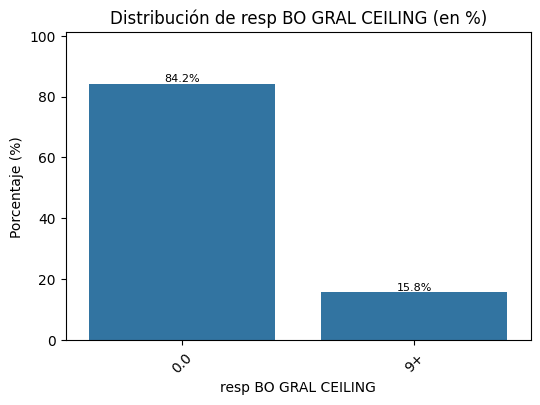

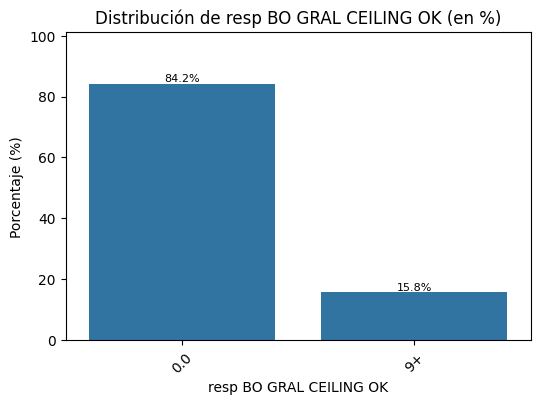

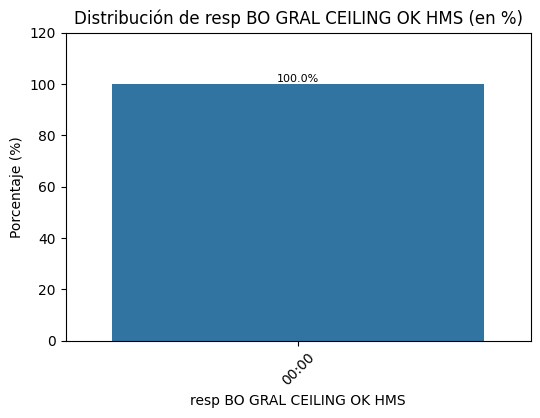

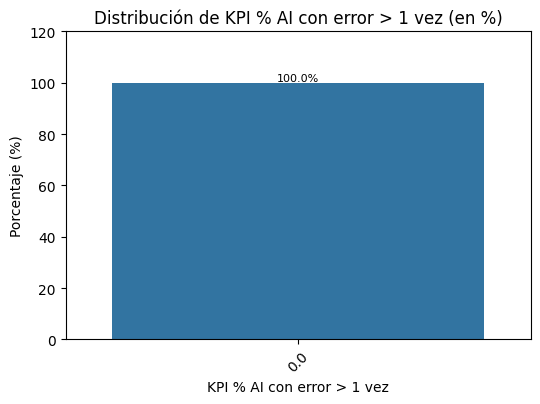

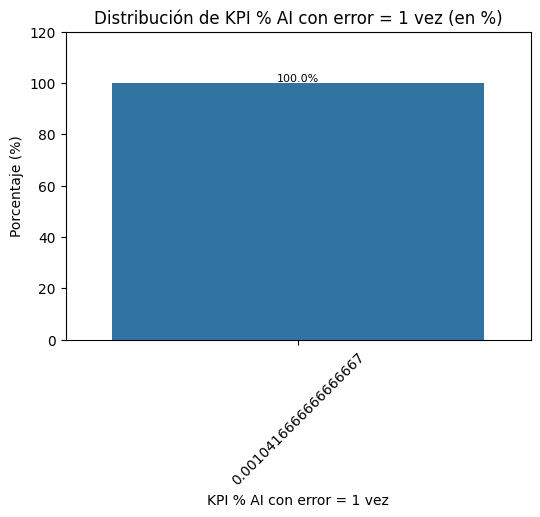

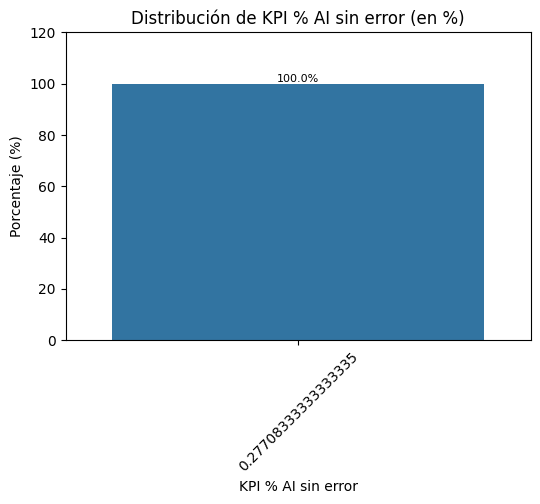

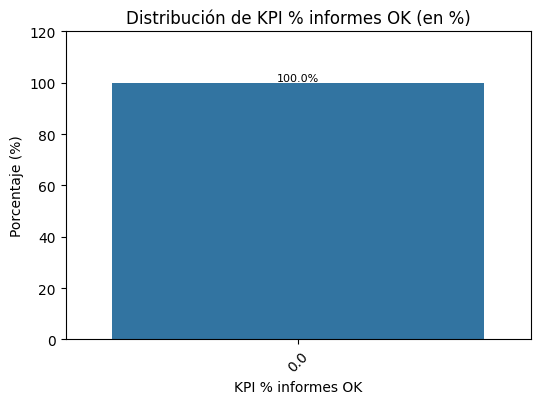

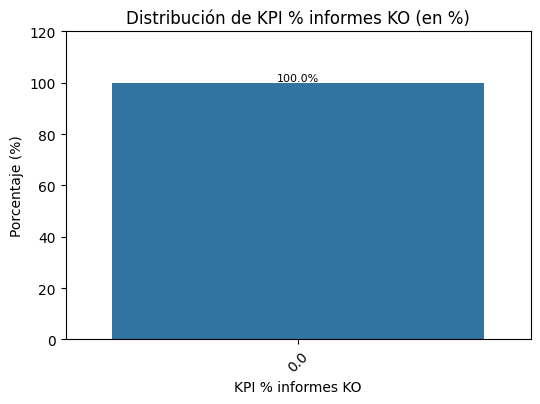

In [24]:
%matplotlib inline
for col in kpi_columns:
    # Filtrar los valores válidos
    valid_values = df_calc[col][~df_calc[col].isin(["error", "n/a"])]

    if valid_values.empty:
        continue  # Si no hay datos válidos, salta a la próxima columna

    # Separar valores numéricos de no numéricos
    numeric_values = []
    text_values = []

    for val in valid_values.unique():
        if val is not None:  # Ensure val is not None before attempting conversion
            try:
                numeric_values.append((float(val), val))  # guardamos tupla (número real, valor original)
            except ValueError:
                text_values.append(val)  # no se puede convertir = texto

    # Ordenar: primero los numéricos por su valor real, luego los textos alfabéticamente
    sorted_numeric = [v[1] for v in sorted(numeric_values)]
    sorted_text = sorted(text_values)
    sorted_categories = sorted_numeric + sorted_text

    # Calcular % para cada categoría
    total_count = len(valid_values)
    percent = valid_values.value_counts(normalize=True) * 100  # Normaliza y convierte a %

    # Crear el gráfico
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(x=percent.index, y=percent.values, order=sorted_categories)

    plt.title(f"Distribución de {col} (en %)")
    plt.xlabel(col)
    plt.ylabel("Porcentaje (%)")
    plt.xticks(rotation=45)

    # Agregar etiquetas encima de cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=8)

    plt.ylim(0, percent.max() * 1.2)  # un poco de espacio arriba para las etiquetas
    plt.show()
    #stop cycle
    #break


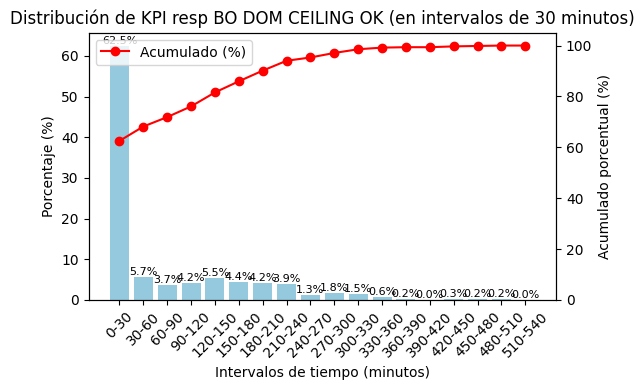

In [25]:
col_interes = ['KPI resp BO DOM CEILING OK']

for col in col_interes:
    valid_values = df_calc[col][~df_calc[col].isin(["error", "n/a"])]

    if valid_values.empty:
        continue

    def convertir_a_minutos(valor):
        if isinstance(valor, str) and ":" in valor:
            horas, minutos = map(int, valor.split(":"))
            return horas * 60 + minutos
        elif valor == "9+":
            return 540
        return None

    valid_values_minutos = valid_values.apply(convertir_a_minutos).dropna()

    max_minutos = valid_values_minutos.max()
    bins = list(range(0, int(max_minutos) + 30, 30))
    labels = [f"{i}-{i+30}" for i in bins[:-1]]

    binned_values = pd.cut(valid_values_minutos, bins=bins, labels=labels, right=False)

    percent = binned_values.value_counts(normalize=True).reindex(labels, fill_value=0) * 100
    acumulado_percent = percent.cumsum()

    fig, ax1 = plt.subplots(figsize=(6, 4))

    # Barras
    sns.barplot(x=percent.index, y=percent.values, order=labels, ax=ax1, color="skyblue")
    ax1.set_title(f"Distribución de {col} (en intervalos de 30 minutos)")
    ax1.set_xlabel("Intervalos de tiempo (minutos)")
    ax1.set_ylabel("Porcentaje (%)")
    ax1.tick_params(axis="x", rotation=45)

    for p in ax1.patches:
        height = p.get_height()
        ax1.annotate(f'{height:.1f}%', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='bottom', fontsize=8)

    # Línea acumulada ordenada
    ax2 = ax1.twinx()
    ax2.plot(labels, acumulado_percent.values, color="red", marker="o", linestyle="-", label="Acumulado (%)")
    ax2.set_ylabel("Acumulado porcentual (%)")
    ax2.set_ylim(0, 105)  # Siempre hasta 100% o un poco más
    ax2.legend(loc="upper left")

    plt.tight_layout()
    plt.show()


In [26]:
df_calc['resp BO GRAL CEILING OK'].replace('n/a', np.nan, inplace=True)

C:\Users\cmenajovsky\AppData\Local\Temp\ipykernel_20792\2015036536.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_calc['resp BO GRAL CEILING OK'].replace('n/a', np.nan, inplace=True)


In [27]:
# Filtrar valores no nulos
filtered_values = df_calc['resp BO GRAL'].dropna()

# Mostrar valores únicos y su conteo
unique_values_count = filtered_values.value_counts()
print(unique_values_count)

resp BO GRAL
n/a    656
0      256
31      24
30      16
28       3
122      2
61       1
6        1
214      1
Name: count, dtype: int64


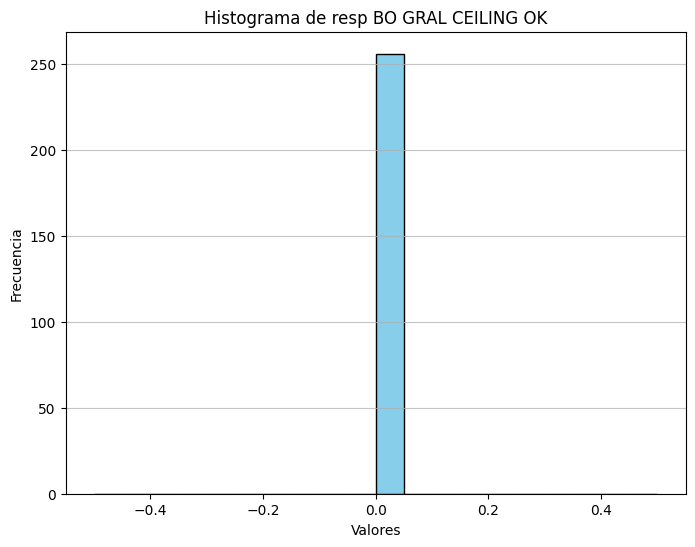

In [28]:
# Filtrar valores no nulos
data = df_calc['resp BO GRAL CEILING OK'].dropna()

# Convertir los valores a numéricos, ignorando errores
data_numeric = pd.to_numeric(data, errors='coerce').dropna()

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(data_numeric, bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de resp BO GRAL CEILING OK')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [29]:
df_calc['resp BO GRAL CEILING OK'].dropna()

8      0.0
11     0.0
18     0.0
22     0.0
25     0.0
      ... 
954    0.0
956    0.0
957    0.0
958    0.0
959    0.0
Name: resp BO GRAL CEILING OK, Length: 304, dtype: object

In [30]:
def decimal_days_to_hms(days):
    """Converts a decimal representation of days to hh:mm:ss format."""
    if pd.isna(days):
        return "n/a"
    total_seconds = days * 24 * 3600
    hours = int(total_seconds // 3600)
    minutes = int((total_seconds % 3600) // 60)
    seconds = int(total_seconds % 60)
    return f"{hours:02d}:{minutes:02d}"

In [31]:
# Apply the conversion function to the column
df_calc['cálculo resp BO DOM HMS'] = df_calc['cálculo resp BO DOM'].apply(
	lambda x: decimal_days_to_hms(float(x)) if isinstance(x, (int, float, str)) and str(x).replace('.', '', 1).isdigit() else "n/a"
)

# Print the resulting DataFrame
print(df_calc['cálculo resp BO DOM HMS'])

0        n/a
1      73:29
2      01:14
3      02:43
4        n/a
       ...  
955      n/a
956    00:00
957    00:00
958      n/a
959    00:37
Name: cálculo resp BO DOM HMS, Length: 960, dtype: object


In [32]:
from math import ceil
def tiempo_a_fraccion_dia(tiempo_str):
    if tiempo_str is None or tiempo_str == "":
        return None
    horas, minutos, segundos = map(int, tiempo_str.split(":"))
    return (horas * 3600 + minutos * 60 + segundos) / (24 * 3600)
# Function to round up to the nearest multiple
def redondear_arriba_al_multiplo(numero, multiplo):
    if multiplo == 0:
        return numero
    return ceil(numero / multiplo) * multiplo


# Value of 5 minutes in fraction of a day
cinco_minutos_en_fraccion = tiempo_a_fraccion_dia("00:05:00")

# Apply the logic to each row in the dataset
def calcular_kpi_resp_bo_dom_ceiling(row):
    calculo_resp_bo_dom = row["cálculo resp BO DOM"]
    if calculo_resp_bo_dom in ["n/a", "error"]:
        return calculo_resp_bo_dom
    else:
        return redondear_arriba_al_multiplo(calculo_resp_bo_dom, cinco_minutos_en_fraccion)
    
df_calc["KPI resp BO DOM CEILING"] = df_calc.apply(calcular_kpi_resp_bo_dom_ceiling, axis=1)

In [33]:
# Apply the conversion function to the column
df_calc['KPI resp BO DOM CEILING HMS'] = df_calc['KPI resp BO DOM CEILING'].apply(
	lambda x: decimal_days_to_hms(float(x)) if isinstance(x, (int, float, str)) and str(x).replace('.', '', 1).isdigit() else "n/a"
)

# Print the resulting DataFrame
print(df_calc['KPI resp BO DOM CEILING HMS'])

0        n/a
1      73:30
2      01:15
3      02:45
4        n/a
       ...  
955      n/a
956    00:00
957    00:00
958      n/a
959    00:40
Name: KPI resp BO DOM CEILING HMS, Length: 960, dtype: object


In [34]:
df_calc["KPI resp BO DOM CEILING"].head()

0         n/a
1      3.0625
2    0.052083
3    0.114583
4         n/a
Name: KPI resp BO DOM CEILING, dtype: object

In [35]:
nueve_horas_en_fraccion = 0.375

# Function to calculate "KPI resp BO DOM CEILING OK" for each row
def calcular_kpi_resp_bo_dom_ceiling_ok(row):
    kpi_resp_bo_dom_ceiling = row["KPI resp BO DOM CEILING"]
    if kpi_resp_bo_dom_ceiling == "n/a":
        return "n/a"
    elif isinstance(kpi_resp_bo_dom_ceiling, (int, float)) and kpi_resp_bo_dom_ceiling > nueve_horas_en_fraccion:
        return "9+"
    elif isinstance(kpi_resp_bo_dom_ceiling, (int, float)):
        # Convert the fraction of a day to hours and minutes
        total_minutes = int(kpi_resp_bo_dom_ceiling * 24 * 60)
        hours = total_minutes // 60
        minutes = total_minutes % 60
        return f"{hours:02d}:{minutes:02d}"
    else:
        return kpi_resp_bo_dom_ceiling
    
df_calc["KPI resp BO DOM CEILING OK"] = df_calc.apply(calcular_kpi_resp_bo_dom_ceiling_ok, axis=1)

In [36]:
df_calc["KPI resp BO DOM CEILING OK"].value_counts()    

KPI resp BO DOM CEILING OK
00:00    306
n/a      244
9+        54
00:05     49
error     42
        ... 
04:39      1
08:19      1
07:24      1
03:49      1
06:20      1
Name: count, Length: 72, dtype: int64

In [37]:
df_calc[ ['cálculo resp BO DOM']].value_counts()
display(df_calc[ ['cálculo resp BO DOM']].head())

,cálculo resp BO DOM
0,n/a
1,3.061806
2,0.052083
3,0.113194
4,n/a


In [38]:
# Convertir a datetime solo si ambos valores son válidos
df_calc['datetime_entrega_informe'] = df_calc.apply(
        lambda row: pd.to_datetime(
            f"{row['fecha_entrega_informe']} {row['hora_entrega_informe']}"#, 
            #errors='coerce'
        ) if pd.notnull(row['fecha_entrega_informe']) and pd.notnull(row['hora_entrega_informe']) else pd.NaT,
        axis=1
    )

# Convertir a datetime solo si ambos valores son válidos
df_calc['datetime_termino_inspeccion'] = df_calc.apply(
        lambda row: pd.to_datetime(
            f"{row['fecha_termino_inspeccion']} {row['hora_termino_inspeccion']}"#, 
            #errors='coerce'
        ) if pd.notnull(row['fecha_termino_inspeccion']) and pd.notnull(row['hora_termino_inspeccion']) else pd.NaT,
        axis=1
    )

def calcular_resp_bo_gral(row):
    fecha_termino = pd.to_datetime(row["datetime_termino_inspeccion"], errors='coerce')
    fecha_entrega = pd.to_datetime(row["datetime_entrega_informe"], errors='coerce')
    resp_bo_gral = ""

    if pd.isnull(fecha_termino) or pd.isnull(fecha_entrega) or fecha_entrega < fecha_termino:
        resp_bo_gral = "n/a"
    else:
        #diferencia = calcular_diferencia_en_dias(fecha_entrega, fecha_termino)
        diferencia = fecha_entrega-fecha_termino
        if diferencia is None:
            resp_bo_gral = "error"
        else:
            #print(row["fecha_termino_inspeccion"], fecha_termino, row["fecha_entrega_informe"],fecha_entrega, diferencia)
            resp_bo_gral = diferencia

    return resp_bo_gral

 # Add the new column to the dataframe
df_calc["resp BO GRAL"] = df_calc.apply(calcular_resp_bo_gral, axis=1)

# Apply the conversion function to the column
df_calc['resp BO GRAL HMS'] = df_calc['resp BO GRAL'].apply(
    lambda x: f"{x.components.hours:02d}:{x.components.minutes:02d}" if isinstance(x, pd.Timedelta) else "n/a"
)

# Print the resulting DataFrame
print(df_calc['resp BO GRAL HMS'])

C:\Users\cmenajovsky\AppData\Local\Temp\ipykernel_20792\611236546.py:12: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  lambda row: pd.to_datetime(


0        n/a
1        n/a
2        n/a
3        n/a
4        n/a
       ...  
955      n/a
956    00:08
957    04:06
958    00:58
959    00:38
Name: resp BO GRAL HMS, Length: 960, dtype: object


In [39]:
df_calc["resp BO GRAL"].value_counts()

resp BO GRAL
n/a                656
0 days 00:08:00      7
0 days 00:14:00      6
0 days 00:13:00      6
0 days 00:09:00      6
                  ... 
0 days 00:53:00      1
0 days 00:49:00      1
0 days 04:06:00      1
0 days 00:58:00      1
0 days 00:38:00      1
Name: count, Length: 208, dtype: int64

In [40]:
# Apply the logic to calculate "resp BO GRAL EXCLUYE 0 y 9+" for each row in the dataset
def calcular_resp_bo_gral_excluye(row):
    if isinstance(row["resp BO GRAL"], pd.Timedelta):
        row["resp BO GRAL"] = row["resp BO GRAL"].total_seconds() / (24 * 3600)
    resp_bo_gral = row["resp BO GRAL"]
    resp_bo_gral_excluye = ""

    if resp_bo_gral == "n/a":
        resp_bo_gral_excluye = "n/a"
    elif isinstance(resp_bo_gral, (int, float)) and resp_bo_gral <= 0:
        resp_bo_gral_excluye = "0"
    elif isinstance(resp_bo_gral, (int, float)) and resp_bo_gral > nueve_horas_en_fraccion:
        resp_bo_gral_excluye = "9+"
    elif isinstance(resp_bo_gral, (int, float)):
        resp_bo_gral_excluye = resp_bo_gral

    return resp_bo_gral_excluye
# Add the new column to the dataframe
df_calc["resp BO GRAL EXCLUYE 0 y 9+"] = df_calc.apply(calcular_resp_bo_gral_excluye, axis=1)

print(df_calc["resp BO GRAL EXCLUYE 0 y 9+"].value_counts())

df_calc['resp BO GRAL EXCLUYE 0 y 9+ HMS'] = df_calc['resp BO GRAL EXCLUYE 0 y 9+'].apply(
    lambda x: f"{int(x * 24):02d}:{int((x * 24 * 60) % 60):02d}" if isinstance(x, (int, float)) else "n/a"
)

df_calc['resp BO GRAL EXCLUYE 0 y 9+ HMS'].value_counts()

resp BO GRAL EXCLUYE 0 y 9+
n/a         656
9+           50
0.005556      7
0.009722      6
0.00625       6
           ... 
0.036806      1
0.034028      1
0.170833      1
0.040278      1
0.026389      1
Name: count, Length: 159, dtype: int64


resp BO GRAL EXCLUYE 0 y 9+ HMS
n/a      706
00:12     10
00:25     10
00:08      7
00:14      6
        ... 
01:12      1
00:49      1
04:05      1
00:58      1
00:38      1
Name: count, Length: 151, dtype: int64

In [41]:
# Function to convert "HH:MM:SS" to a fraction of a day
def tiempo_a_fraccion_dia(tiempo_str):
    if tiempo_str is None or tiempo_str == "":
        return None
    horas, minutos, segundos = map(int, tiempo_str.split(":"))
    return (horas * 3600 + minutos * 60 + segundos) / (24 * 3600)

# Value of 5 minutes in fraction of a day
cinco_minutos_en_fraccion = tiempo_a_fraccion_dia("00:05:00")

# Function to round up to the nearest multiple
def redondear_arriba_al_multiplo(numero, multiplo):
    if multiplo == 0:
        return numero
    return ceil(numero / multiplo) * multiplo

# Function to convert a value to a number (handling the case of "0")
def convertir_a_numero(valor):
    if valor == "0":
        return 0
    try:
        return float(valor)
    except ValueError:
        return None

# Apply the logic to each row in the dataset
def calcular_resp_bo_gral_ceiling(row):
    resp_bo_gral_excluye = row["resp BO GRAL EXCLUYE 0 y 9+"]
    resp_bo_gral_ceiling = ""

    if resp_bo_gral_excluye == "n/a":
        resp_bo_gral_ceiling = "n/a"
    elif resp_bo_gral_excluye == "9+":
        resp_bo_gral_ceiling = "9+"
    else:
        numero_resp = convertir_a_numero(resp_bo_gral_excluye)
        if numero_resp is not None:
            resp_bo_gral_ceiling = redondear_arriba_al_multiplo(numero_resp, cinco_minutos_en_fraccion)
        else:
            resp_bo_gral_ceiling = "error"

    return resp_bo_gral_ceiling

# Add the new column to the dataframe
df_calc["resp BO GRAL CEILING"] = df_calc.apply(calcular_resp_bo_gral_ceiling, axis=1)

df_calc["resp BO GRAL CEILING"].value_counts()

resp BO GRAL CEILING
n/a         656
9+           50
0.006944     24
0.010417     24
0.013889     20
           ... 
0.097222      1
0.145833      1
0.055556      1
0.194444      1
0.076389      1
Name: count, Length: 82, dtype: int64

In [42]:
# Apply the logic to calculate "resp BO GRAL CEILING OK" for each row in the dataset
def calcular_resp_bo_gral_ceiling_ok(row):
    resp_bo_gral_ceiling = row["resp BO GRAL CEILING"]
    if resp_bo_gral_ceiling == "n/a":
        return "n/a"
    elif resp_bo_gral_ceiling == "9+":
        return "9+"
    elif isinstance(resp_bo_gral_ceiling, (int, float)) and resp_bo_gral_ceiling > nueve_horas_en_fraccion:
        return "9+"
    elif isinstance(resp_bo_gral_ceiling, (int, float)):
        return resp_bo_gral_ceiling
    return None

# Add the new column to the dataframe
df_calc["resp BO GRAL CEILING OK"] = df_calc.apply(calcular_resp_bo_gral_ceiling_ok, axis=1)

df_calc["resp BO GRAL CEILING OK"].value_counts()

df_calc["resp BO GRAL CEILING OK HMS"] = df_calc["resp BO GRAL CEILING OK"].apply(
    lambda x: f"{int(x * 24):02d}:{int((x * 24 * 60) % 60):02d}" if isinstance(x, (int, float)) else "n/a"
)

df_calc["resp BO GRAL CEILING OK HMS"].value_counts()

resp BO GRAL CEILING OK HMS
n/a      706
00:15     24
00:10     24
00:20     20
00:30     16
        ... 
02:19      1
03:29      1
01:20      1
04:39      1
01:49      1
Name: count, Length: 81, dtype: int64

In [43]:
# Lista de feriados
feriados = [
    datetime(2025, 1, 1),  # Año Nuevo
    datetime(2025, 5, 1),  # Día del Trabajador
    datetime(2025, 9, 18),  # Fiestas Patrias
    datetime(2025, 12, 25)  # Navidad
]

# Function to combine date and time into a datetime object
def combinar_fecha_hora(fecha, hora):
    if pd.isnull(fecha) or pd.isnull(hora):
            return None
    return pd.to_datetime(f"{fecha} {hora}",format='%d-%m-%Y %H:%M', errors='coerce')

# Apply the logic to calculate "fecha/hora ASIS" for each row in the dataset
def calcular_fecha_hora_asis(row):
    informe_final = row["informe_final"]
    fecha_primera_llamada = row["fecha_1_llamada"]
    fecha_cita_concreta = row["fecha_termino_inspeccion"] #fecha_cita_concreta_inspeccion
    hora_cita_concreta = row["hora_termino_inspeccion"] #hora_cita_concreta_inspeccion
    fecha_hora_asis = ""

    if informe_final == "Informe asistida" and pd.notnull(fecha_primera_llamada):
        
        fecha_hora_asis = combinar_fecha_hora(fecha_cita_concreta, hora_cita_concreta)
        print(f"ya {fecha_hora_asis} {informe_final} {fecha_primera_llamada} {row["hora_termino_inspeccion"]}")
    else:
        fecha_hora_asis = "n/a"

    return fecha_hora_asis


# Add the new column to the dataframe
df_calc["fecha/hora ASIS"] = df_calc.apply(calcular_fecha_hora_asis, axis=1)
df_calc["fecha/hora ASIS"].value_counts()

ya 2025-04-07 17:20:00 Informe asistida 07-04-2025 17:20
ya 2025-04-02 11:41:00 Informe asistida 01-04-2025 11:41
ya 2025-04-01 17:47:00 Informe asistida 28-03-2025 17:47
ya 2025-03-31 15:35:00 Informe asistida 28-03-2025 15:35
ya 2025-04-09 10:57:00 Informe asistida 02-04-2025 10:57
ya 2025-03-24 17:54:00 Informe asistida 21-03-2025 17:54
ya 2025-03-19 17:16:00 Informe asistida 19-03-2025 17:16
ya 2025-03-18 17:30:00 Informe asistida 18-03-2025 17:30
ya 2025-03-22 17:05:00 Informe asistida 12-03-2025 17:05
ya 2025-03-11 11:45:00 Informe asistida 10-03-2025 11:45
ya 2025-03-10 16:54:00 Informe asistida 10-03-2025 16:54
ya 2025-03-10 16:09:00 Informe asistida 07-03-2025 16:09
ya 2025-03-14 18:13:00 Informe asistida 07-03-2025 18:13
ya 2025-03-06 16:38:00 Informe asistida 06-03-2025 16:38
ya 2025-03-07 15:28:00 Informe asistida 06-03-2025 15:28
ya 2025-03-15 08:33:00 Informe asistida 05-03-2025 08:33
ya 2025-03-07 16:54:00 Informe asistida 04-03-2025 16:54
ya 2025-03-05 08:54:00 Informe 

fecha/hora ASIS
n/a                    942
2025-04-07 17:20:00      1
2025-04-02 11:41:00      1
2025-04-01 17:47:00      1
2025-03-31 15:35:00      1
2025-04-09 10:57:00      1
2025-03-24 17:54:00      1
2025-03-19 17:16:00      1
2025-03-18 17:30:00      1
2025-03-22 17:05:00      1
2025-03-11 11:45:00      1
2025-03-10 16:54:00      1
2025-03-10 16:09:00      1
2025-03-14 18:13:00      1
2025-03-06 16:38:00      1
2025-03-07 15:28:00      1
2025-03-15 08:33:00      1
2025-03-07 16:54:00      1
2025-03-05 08:54:00      1
Name: count, dtype: int64

In [44]:
# Filtrar columnas que contienen "hora" en su nombre
hora_columns = [col for col in df_calc.columns if "fecha" in col.lower()]

# Filtrar filas donde informe_final es "Informe asistida"
filtered_rows = df_calc[df_calc["informe_final"] == "Informe asistida"]

# Mostrar las columnas seleccionadas
filtered_data = filtered_rows[hora_columns]
#display(filtered_data)

In [45]:

# Apply the logic to calculate "fecha/hora entrega informe ASIS" for each row in the dataset
def calcular_fecha_hora_entrega_asis(row):
    informe_final = row["informe_final"]
    fecha_ultimo_agendamiento = row["fecha_ult_agendamiento"]
    hora_ultimo_agendamiento = row["hora_ult_agendamiento"]
    fecha_hora_entrega_asis = ""

    if informe_final == "Informe Asistida" and pd.notnull(fecha_ultimo_agendamiento):
        fecha_hora_entrega_asis = combinar_fecha_hora(fecha_ultimo_agendamiento, hora_ultimo_agendamiento)
    else:
        fecha_hora_entrega_asis = "n/a"

    return fecha_hora_entrega_asis

# Define upperASIS and lowerASIS (in fraction of a day)
upperASIS = 18 / 24
lowerASIS = 9 / 24

# Function to calculate business days excluding weekends and holidays
def calcular_dias_laborables_intl(fecha_inicio, fecha_fin, weekend_code, holidays):
    if pd.isnull(fecha_inicio) or pd.isnull(fecha_fin):
        return None
    fecha_inicio = pd.to_datetime(fecha_inicio, errors='coerce')
    fecha_fin = pd.to_datetime(fecha_fin, errors='coerce')
    if pd.isnull(fecha_inicio) or pd.isnull(fecha_fin):
        return None

    dias_laborables = 0
    fecha_actual = fecha_inicio
    while fecha_actual <= fecha_fin:
        if fecha_actual.weekday() < 5 and fecha_actual not in holidays:  # Exclude weekends and holidays
            dias_laborables += 1
        fecha_actual += timedelta(days=1)
    return dias_laborables

# Apply the logic to each row in the dataset
def calcular_resp_bo_asis(row):
    fecha_asis = row["fecha/hora ASIS"]
    fecha_entrega_asis = row["fecha/hora entrega informe ASIS"]
    calculo_resp_bo_asis = ""

    if pd.isnull(fecha_asis) or pd.isnull(fecha_entrega_asis) or fecha_entrega_asis < fecha_asis:
        calculo_resp_bo_asis = "n/a"
    else:
        dias_laborables = calcular_dias_laborables_intl(fecha_asis, fecha_entrega_asis, 11, feriados)
        if dias_laborables is None:
            return "n/a"
        dias_laborables -= 1
        residuo_inicio_asis = (fecha_asis - pd.Timestamp(fecha_asis.date())).total_seconds() / (24 * 3600)
        residuo_entrega_asis = (fecha_entrega_asis - pd.Timestamp(fecha_entrega_asis.date())).total_seconds() / (24 * 3600)

        dias_laborables_hasta_entrega_asis = calcular_dias_laborables_intl(fecha_asis, fecha_entrega_asis, 11, feriados)
        dias_laborables_hasta_inicio_asis = calcular_dias_laborables_intl(fecha_asis, fecha_asis, 11, feriados)

        parte_entrega_asis = mediana(residuo_entrega_asis, upperASIS, lowerASIS) if dias_laborables_hasta_entrega_asis > 0 else upperASIS
        parte_inicio_asis = mediana(dias_laborables_hasta_inicio_asis * residuo_inicio_asis, upperASIS, lowerASIS)

        resultado_asis = (dias_laborables * (upperASIS - lowerASIS)) + parte_entrega_asis - parte_inicio_asis

        if resultado_asis < 0:
            calculo_resp_bo_asis = "error"
        else:
            calculo_resp_bo_asis = resultado_asis

    return calculo_resp_bo_asis




# Add the new column to the dataframe
#df_calc["fecha/hora entrega informe ASIS"] = df_calc.apply(calcular_fecha_hora_entrega_asis, axis=1)


# Add the new column to the dataframe
df_calc["cálculo resp BO ASIS"] = df_calc.apply(calcular_resp_bo_asis, axis=1)


TypeError: '<' not supported between instances of 'str' and 'Timestamp'

In [ ]:
df_calc["fecha/hora ASIS"].value_counts()

fecha/hora ASIS
n/a    960
Name: count, dtype: int64

In [ ]:
df_calc["cálculo resp BO ASIS"].value_counts()

cálculo resp BO ASIS
n/a    960
Name: count, dtype: int64

In [ ]:

# Add the new column to the dataframe
df["KPI resp BO ASIS CEILING"] = df.apply(calcular_kpi_resp_bo_asis_ceiling, axis=1)


# Aplicar la función al DataFrame
df["KPI resp BO ASIS CEILING OK"] = df.apply(calcular_kpi_resp_bo_asis_ceiling_ok, axis=1)

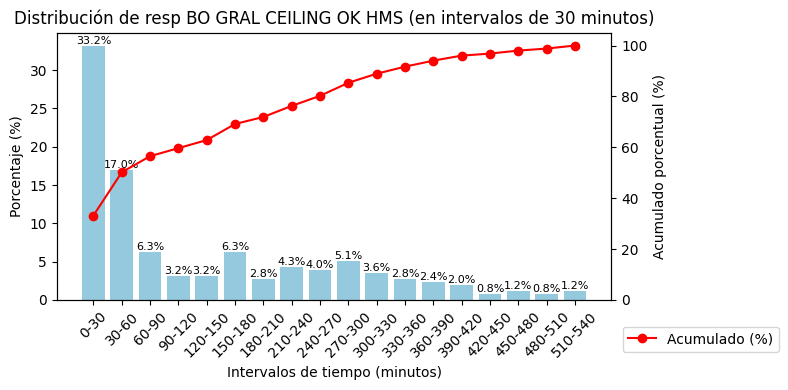

In [ ]:
col_interes = ['cálculo resp BO DOM HMS']
col_interes = ['KPI resp BO DOM CEILING OK']
col_interes = ['resp BO GRAL HMS']
col_interes = ['resp BO GRAL CEILING OK HMS']

for col in col_interes:
    valid_values = df_calc[col][~df_calc[col].isin(["error", "n/a"])]

    if valid_values.empty:
        continue

    def convertir_a_minutos(valor):
        if isinstance(valor, str) and ":" in valor:
            horas, minutos = map(int, valor.split(":"))
            return horas * 60 + minutos
        elif valor == "9+":
            return 540
        return None

    # Remove NaN values before applying the conversion function
    valid_values = valid_values.dropna()
    valid_values_minutos = valid_values.apply(convertir_a_minutos)

    if valid_values_minutos.dropna().empty:
        print(f"No valid data to process for column {col}.")
        continue

    max_minutos = valid_values_minutos.max()
    bins = list(range(0, int(max_minutos) + 30, 30))
    labels = [f"{i}-{i+30}" for i in bins[:-1]]

    binned_values = pd.cut(valid_values_minutos, bins=bins, labels=labels, right=False)

    percent = binned_values.value_counts(normalize=True).reindex(labels, fill_value=0) * 100
    acumulado_percent = percent.cumsum()

    fig, ax1 = plt.subplots(figsize=(8, 4))  # un poco más ancho para dar espacio a la leyenda

    sns.barplot(x=percent.index, y=percent.values, order=labels, ax=ax1, color="skyblue")
    ax1.set_title(f"Distribución de {col} (en intervalos de 30 minutos)")
    ax1.set_xlabel("Intervalos de tiempo (minutos)")
    ax1.set_ylabel("Porcentaje (%)")
    ax1.tick_params(axis="x", rotation=45)

    for p in ax1.patches:
        height = p.get_height()
        ax1.annotate(f'{height:.1f}%', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='bottom', fontsize=8)

    ax2 = ax1.twinx()
    ax2.plot(labels, acumulado_percent.values, color="red", marker="o", linestyle="-", label="Acumulado (%)")
    ax2.set_ylabel("Acumulado porcentual (%)")
    ax2.set_ylim(0, 105)

    # Mover leyenda fuera del gráfico
    ax2.legend(loc="upper left", bbox_to_anchor=(1.02, -0.1), borderaxespad=0)

    plt.tight_layout()
    plt.show()


In [ ]:
col_interes = ['cálculo resp BO DOM HMS']
col_interes = ['KPI resp BO DOM CEILING OK']
col_interes = ['resp BO GRAL HMS']
col_interes = ['resp BO GRAL CEILING OK HMS']





{'promedio': '02:11', 'mediana': '00:57'}


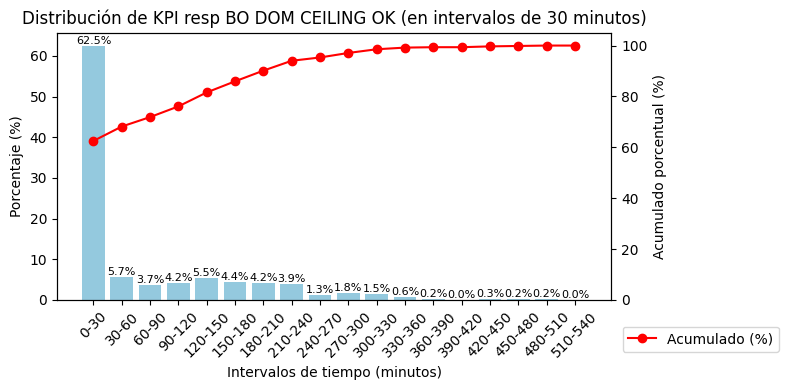

In [ ]:
col_interes = ['KPI resp BO DOM CEILING OK']

for col in col_interes:
    valid_values = df_calc[col][~df_calc[col].isin(["error", "n/a"])]

    if valid_values.empty:
        continue

    def convertir_a_minutos(valor):
        if isinstance(valor, str) and ":" in valor:
            horas, minutos = map(int, valor.split(":"))
            return horas * 60 + minutos
        elif valor == "9+":
            return 540
        return None

    valid_values_minutos = valid_values.apply(convertir_a_minutos).dropna()

    max_minutos = valid_values_minutos.max()
    bins = list(range(0, int(max_minutos) + 30, 30))
    labels = [f"{i}-{i+30}" for i in bins[:-1]]

    binned_values = pd.cut(valid_values_minutos, bins=bins, labels=labels, right=False)

    percent = binned_values.value_counts(normalize=True).reindex(labels, fill_value=0) * 100
    acumulado_percent = percent.cumsum()

    fig, ax1 = plt.subplots(figsize=(8, 4))  # un poco más ancho para dar espacio a la leyenda

    sns.barplot(x=percent.index, y=percent.values, order=labels, ax=ax1, color="skyblue")
    ax1.set_title(f"Distribución de {col} (en intervalos de 30 minutos)")
    ax1.set_xlabel("Intervalos de tiempo (minutos)")
    ax1.set_ylabel("Porcentaje (%)")
    ax1.tick_params(axis="x", rotation=45)

    for p in ax1.patches:
        height = p.get_height()
        ax1.annotate(f'{height:.1f}%', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='bottom', fontsize=8)

    ax2 = ax1.twinx()
    ax2.plot(labels, acumulado_percent.values, color="red", marker="o", linestyle="-", label="Acumulado (%)")
    ax2.set_ylabel("Acumulado porcentual (%)")
    ax2.set_ylim(0, 105)

    # Mover leyenda fuera del gráfico
    ax2.legend(loc="upper left", bbox_to_anchor=(1.02, -0.1), borderaxespad=0)

    plt.tight_layout()
    plt.show()


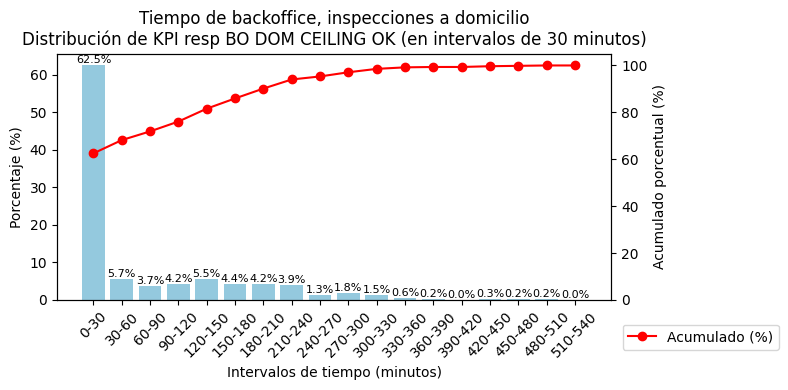

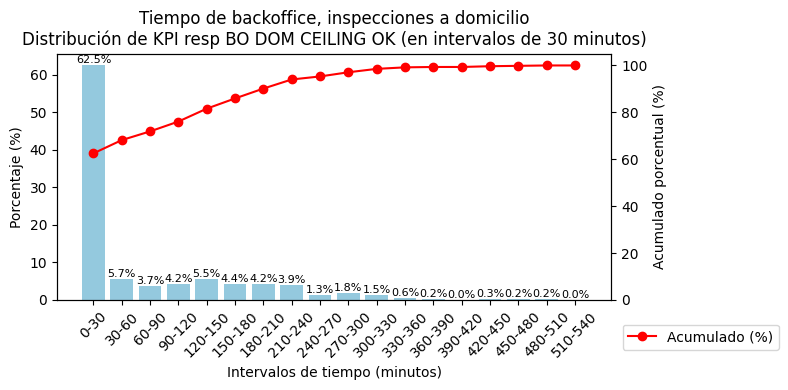

In [ ]:
from grafica import grafica_atributo

grafica_atributo(df_calc,'KPI resp BO DOM CEILING OK', "Tiempo de backoffice, inspecciones a domicilio" )

In [ ]:
kpi_columns

['KPI DÍAS EN COORDINAR DC',
 'KPI DÍAS EN COORDINAR DC OK',
 'KPI DÍAS EN COORDINAR DH',
 'KPI DÍAS EN COORDINAR DH OK',
 'KPI DÍAS EN INSPECCIONAR DC',
 'KPI DÍAS EN INSPECCIONAR DC OK',
 'KPI DÍAS EN INSPECCIONAR DH',
 'KPI DÍAS EN INSPECCIONAR DH OK',
 'KPI resp BO DOM CEILING',
 'KPI resp BO DOM CEILING OK',
 'KPI resp BO AI CEILING',
 'KPI resp BO AI CEILING OK',
 'KPI resp BO AI sin error CEILING',
 'KPI resp BO AI sin error CEILING OK',
 'resp BO GRAL',
 'resp BO GRAL EXCLUYE 0 y 9+',
 'resp BO GRAL CEILING',
 'resp BO GRAL CEILING OK',
 'KPI resp BO ASIS CEILING',
 'KPI resp BO ASIS CEILING OK',
 'KPI % AI con error > 1 vez',
 'KPI % AI con error = 1 vez',
 'KPI % AI sin error',
 'KPI % informes OK',
 'KPI % informes KO']